In [2]:
# use gridsearchcv this time to find the best hyperparameters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from mlxtend.plotting import plot_decision_regions

In [2]:
digits=load_digits()
X=digits.data
y=digits.target

In [3]:
X=pd.DataFrame(X,columns=digits.feature_names)
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
X.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

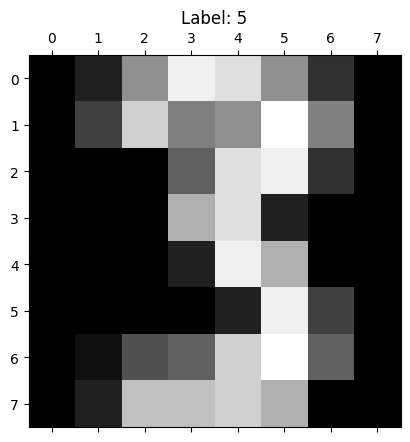

In [7]:
plt.gray()
plt.matshow(digits.images[13])
plt.title(f"Label: {digits.target[5]}")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
model_svc=SVC()
model_svc.fit(X_train,y_train)
model_svc.score(X_test,y_test)

0.9888888888888889

In [9]:
model_linear=SVC(kernel='linear')
model_linear.fit(X_train,y_train)
model_linear.score(X_test,y_test)

0.9888888888888889

In [10]:
model_poly=SVC(kernel='poly',degree=3)
model_poly.fit(X_train,y_train)
model_poly.score(X_test,y_test)

0.9916666666666667

In [11]:
model_rbf=SVC(kernel='rbf', gamma=0.0001)
model_rbf.fit(X_train,y_train)
model_rbf.score(X_test,y_test)

0.9777777777777777

High gamma(close reach) and very less gamma(far reach) decreases the accuracy

Reducing the dimension,using pca, to 2 to analyse whether data is linearly separable or not

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

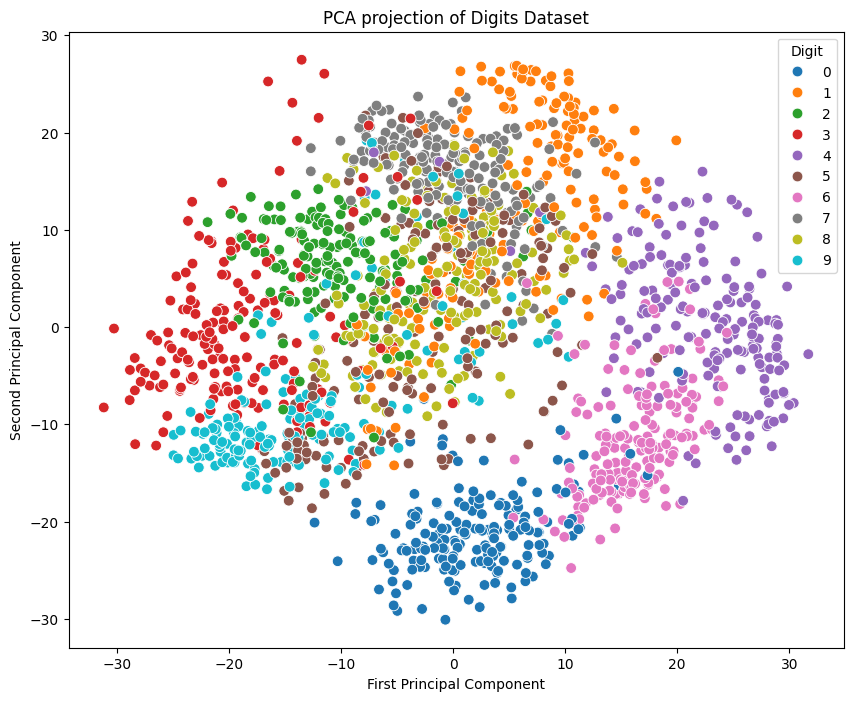

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", s=60)
plt.title("PCA projection of Digits Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title='Digit')
plt.show()

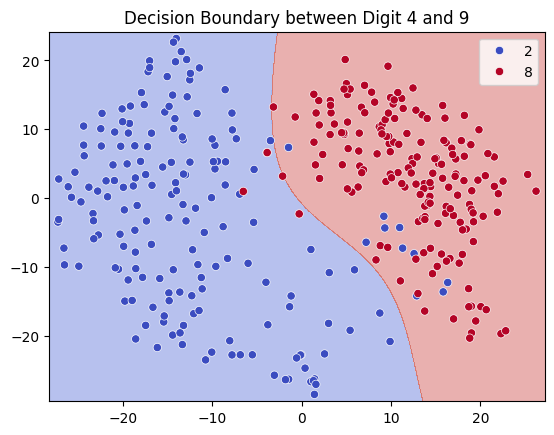

In [7]:

# Select only classes 1 and 7
mask = (y == 2) | (y == 8)
X_2class = X[mask]
y_2class = y[mask]

# PCA to 2D
X_2class_pca = PCA(n_components=2).fit_transform(X_2class)

# Train logistic regression
# model = LogisticRegression()
model=SVC(kernel='rbf')
model.fit(X_2class_pca, y_2class)

# Plot
h = .02
x_min, x_max = X_2class_pca[:, 0].min() - 1, X_2class_pca[:, 0].max() + 1
y_min, y_max = X_2class_pca[:, 1].min() - 1, X_2class_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_2class_pca[:, 0], y=X_2class_pca[:, 1], hue=y_2class, palette='coolwarm')
# plot_decision_regions(X_2class_pca,y_2class,clf=model,legend=2)
plt.title("Decision Boundary between Digit 4 and 9")
plt.show()

In [17]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear','poly']
}
svc = SVC()

grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test data
print("Test Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9888646922183508
Test Accuracy: 0.9944444444444445
